In [1]:
import numpy as np
import os
import pandas as pd
import struct
import matplotlib.pyplot as plt
from utils.event2d import event2d as event2d
from utils.helper import *

#plt.style.use("MC.mplstyle")

In [2]:
fileName = "../Recordings/gaia1_tp_923_825_2up_2dn.dat"
events = read_dat_file(fileName)
ev = remove_ts_offset(events)
gaia1_1kHz = gaia1_extractor(events)

(-0.2, 2.0)

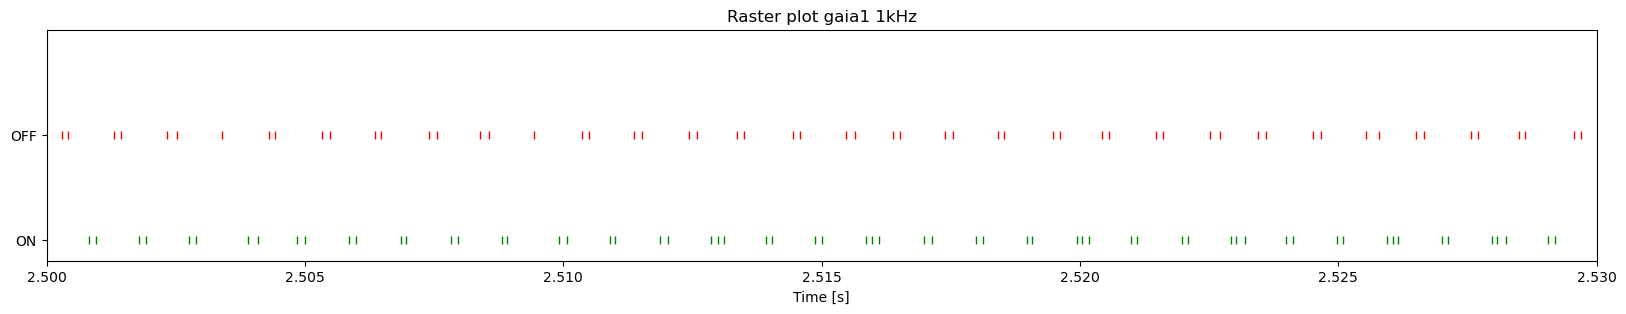

In [3]:

plt.figure(figsize=(20,3))

for e in gaia1_1kHz[10000:12000]:
    if e.p ==0 :
        plt.plot(e.ts*1e-5,1 , 'r|', "OFF")
    if e.p ==1 :
        plt.plot(e.ts*1e-5, 0 , 'g|', "ON")

#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g|',"ON ")
#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r|',"OFF")

        
#plt.legend(prop={'size': 30})
plt.title("Raster plot gaia1 1kHz")
#plt.ylabel("Channel ID")
plt.xlabel("Time [s]")
plt.xlim([2.5,2.53])
plt.ylim([-0.2,2])


(700.0, 1000.0)

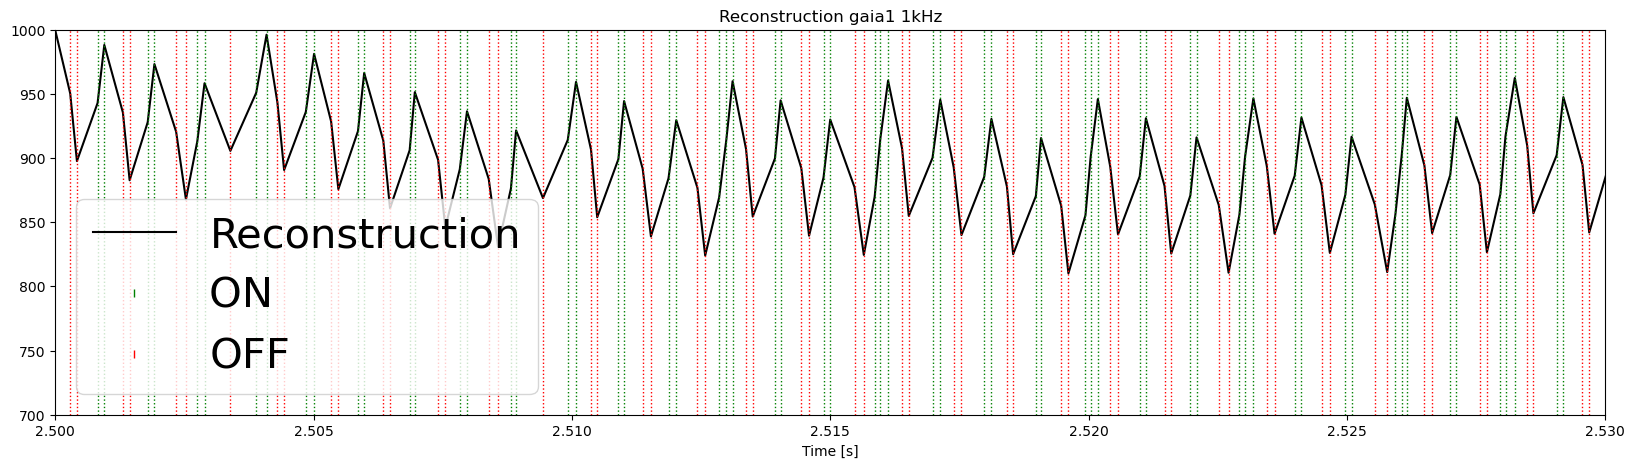

In [4]:
sig,time = reconstruct_channel(gaia1_1kHz,923,825,877.73)

plt.figure(figsize=(20,5))

plt.plot(time,sig, 'k', label = "Reconstruction")
for e in gaia1_1kHz[10000:12000]:
    if e.p ==0 :
        plt.vlines(e.ts*1e-5, 700,1000, color = 'r', linestyle = 'dotted', linewidth = 1)

    if e.p ==1 :
        plt.vlines(e.ts*1e-5, 700,1000, color = 'g', linestyle = 'dotted', linewidth = 1)

plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g|',label = "ON ")
plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r|',label= "OFF")

        
plt.legend(prop={'size': 30})
plt.title("Reconstruction gaia1 1kHz")
#plt.ylabel("Channel ID")
plt.xlabel("Time [s]")
plt.xlim([2.5,2.53])
plt.ylim([700,1000])

In [90]:
vmem_time+0.005

array([9.99999996e-12, 1.00010000e-07, 2.00010000e-07, ...,
       9.99970001e-03, 9.99980001e-03, 9.99990001e-03])

In [155]:
vmem= np.load("scope_data/GAIA1_3UP_2DN__mem.npy")
vmem_time = [tp[0] for tp in vmem]
vmem = [tp[1] for tp in vmem]
vmem_time = np.asarray(vmem_time)


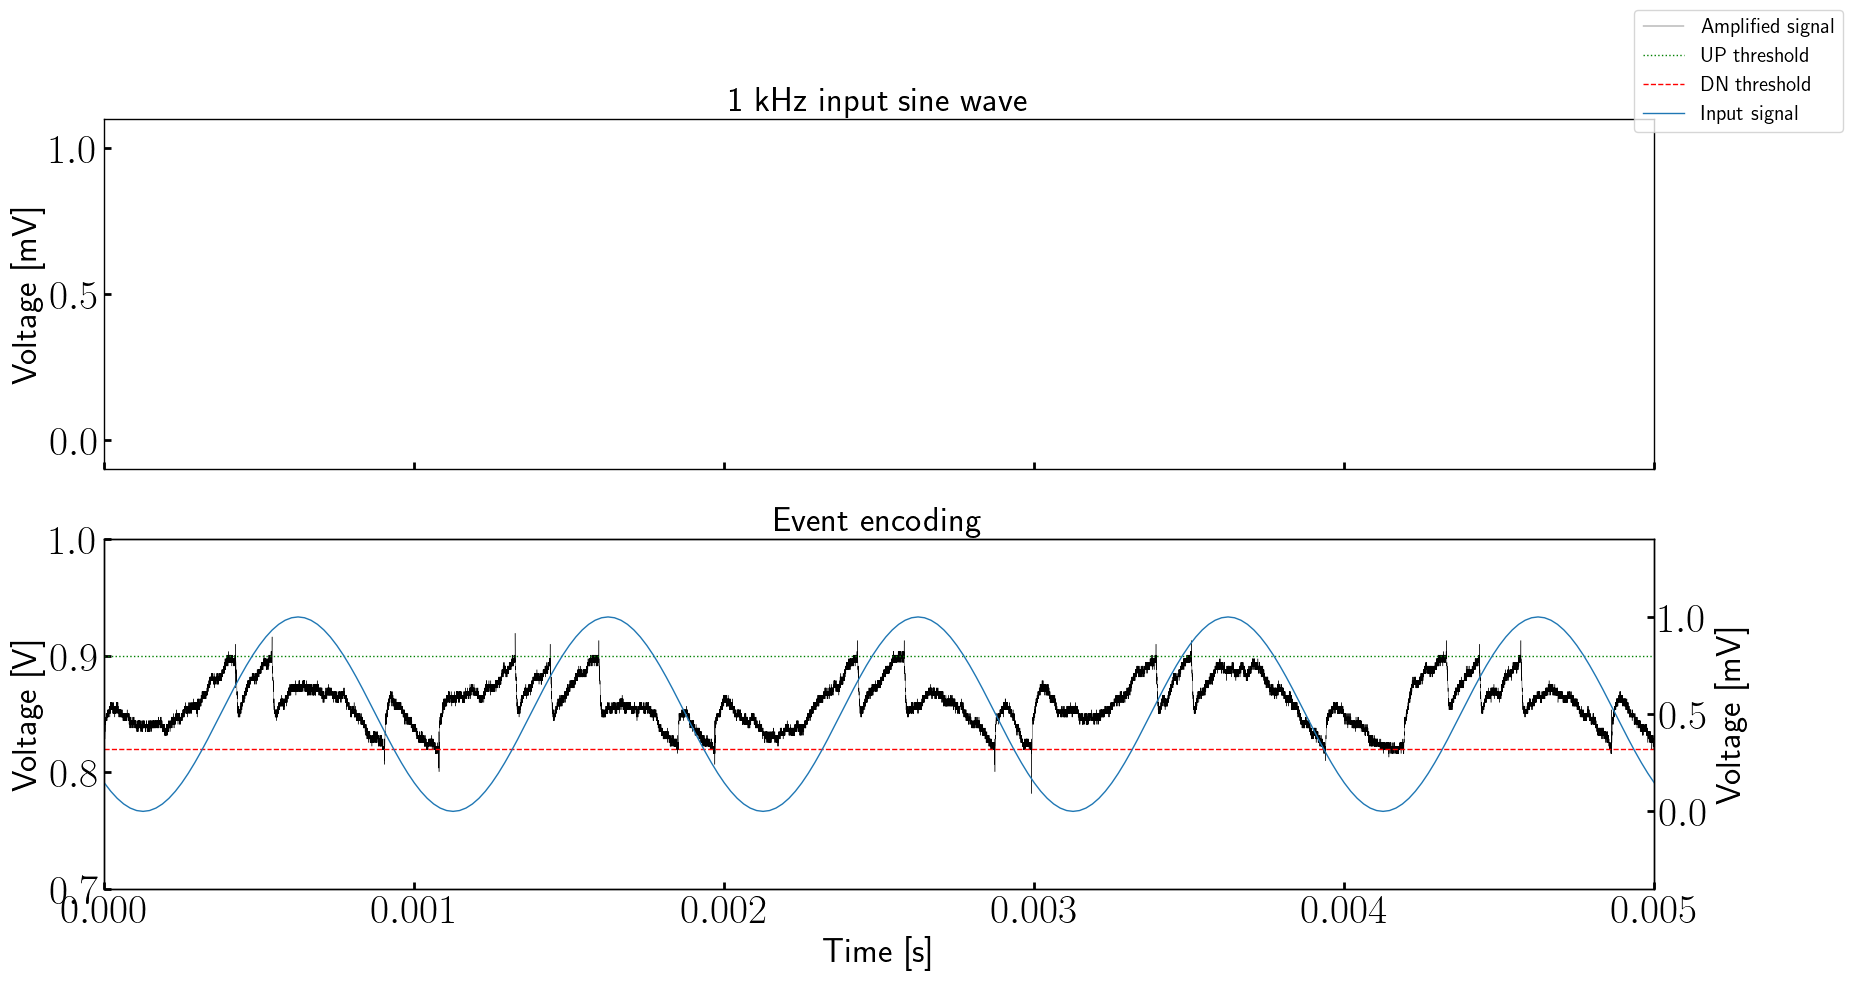

In [171]:

fs = 48000  # sample rate
T = 1/fs

t = np.arange(0, 0.1, T)# time vector

# Generate sine wave
f = 1000  # frequency
A = 0.5 #amplitude
phi = np.pi*5/4
y = A*np.sin(2*np.pi*f*t+phi) +0.5




fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,10), sharex=True)

#ax1.plot(t, y, label = "Input signal", linewidth = 1)
ax1.set_ylabel("Voltage [mV]")
ax1.set_ylim([-0.1,1.1])

ax1.set_xlim([0,0.005])
ax1.set_title("1 kHz input sine wave")


#plt.savefig("1kHz_sine.svg")


ax2.plot(vmem_time, vmem, 'k',linewidth = 0.3, label = "Amplified signal")
ax2.hlines( 0.90,0,0.01,'g', "dotted", linewidth = 1, label = "UP threshold")
ax2.hlines( 0.82,0,0.01,'r', "dashed" ,linewidth = 1, label = "DN threshold")


ax2.set_xlim([0,0.005])
ax2.set_ylim([0.7,1])

axa = ax2.twinx()
axa.plot(t, y, label = "Input signal",  linewidth = 1)
axa.set_ylim([-0.4,1.4])
axa.set_ylabel("Voltage [mV]")

fig.legend(fontsize=15)

ax2.set_title("Event encoding")
ax2.set_ylabel("Voltage [V]")
ax2.set_xlabel("Time [s]")

fig.savefig("Events.svg")




In [15]:
vmem= np.load("scope_data/GAIA1_tight_thresholds_5k__mem.npy")
vmem_time = [tp[0] for tp in vmem]
vmem = [tp[1] for tp in vmem]


TypeError: 'Text' object is not callable

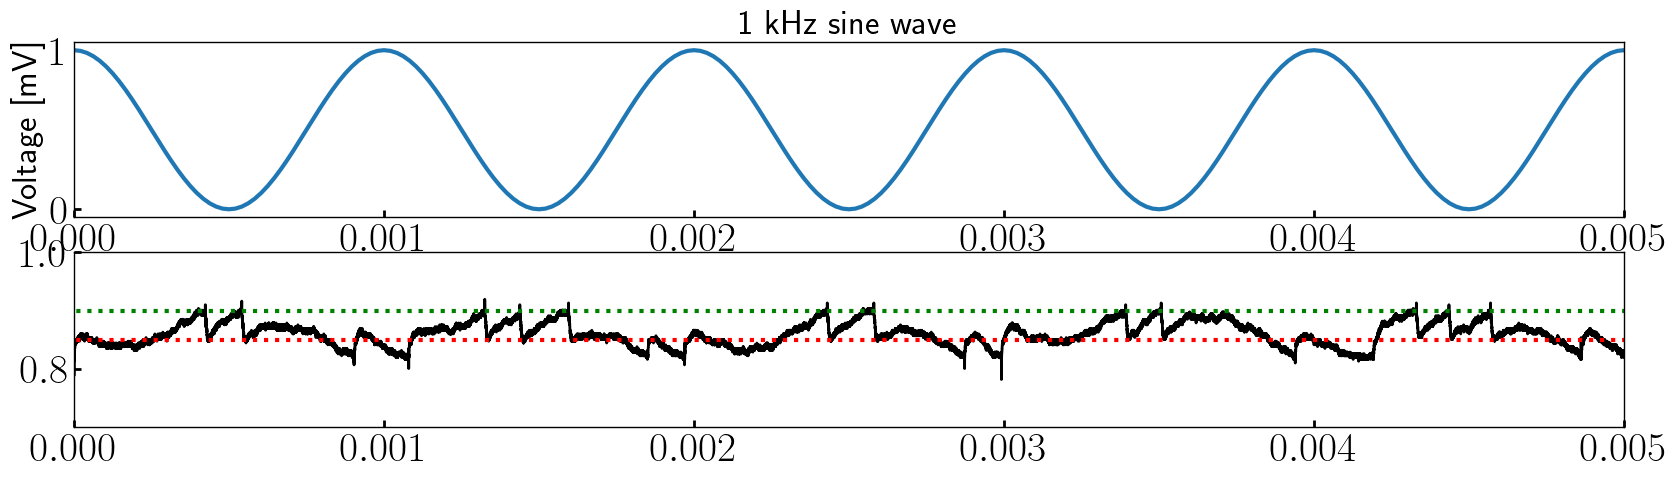

In [127]:
fs = 48000  # sample rate
T = 1/fs

t = np.arange(0, 0.1, T)# time vector

# Generate sine wave
f = 1000  # frequency
A = 0.5 #amplitude
y = A*np.sin(2*np.pi*f*t+np.pi/2) +0.5



fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,5))

ax1.plot(t, y)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [mV]")

ax1.set_xlim([0,0.005])
ax1.set_title("1 kHz sine wave")


#plt.savefig("1kHz_sine.svg")


ax2.plot(vmem_time, vmem, 'k',linewidth = 2)
ax2.hlines( 0.90,-0.001,0.01,'g', "dotted")
ax2.hlines( 0.85,-0.001,0.01,'r', linestyles="dotted")

ax2.set_ylim([0.7,1])
ax2.set_xlim([0,0.005])

ax2.title("Amplified signal with Thresholds")
ax2.ylabel("Voltage [V]")
ax2.xlabel("Time [s]")


In [17]:
vmem= np.load("scope_data/GAIA1_tight_thresholds_100__mem.npy")
vmem_time = [tp[0] for tp in vmem]
vmem = [tp[1] for tp in vmem]


Text(0.5, 0, 'Time [s]')

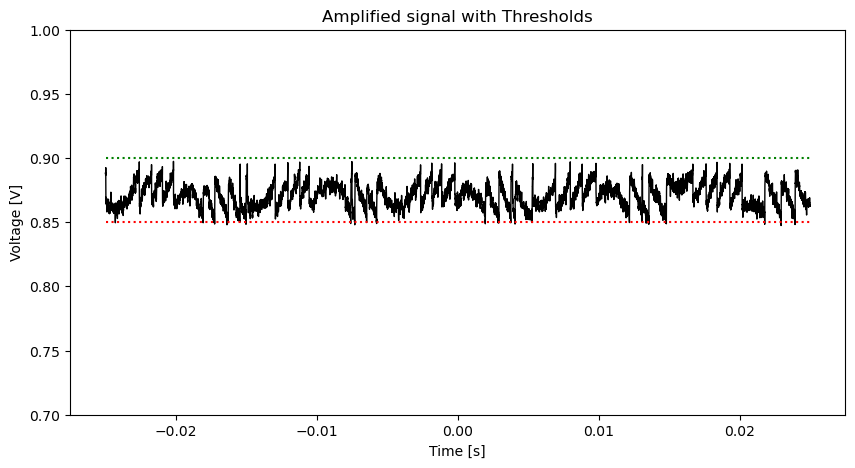

In [18]:
plt.figure(figsize=(10,5))
plt.plot(vmem_time, vmem, 'k',linewidth = 1)
plt.hlines( 0.90,-0.025,0.025,'g', "dotted")
plt.hlines( 0.85,-0.025,0.025,'r', linestyles="dotted")

plt.ylim([0.7,1])
plt.title("Amplified signal with Thresholds")
plt.ylabel("Voltage [V]")
plt.xlabel("Time [s]")

In [19]:
fileName = "../Recordings/gaia1_tp_916_858_many_ev.dat"
events = read_dat_file(fileName)
ev = remove_ts_offset(events)
gaia1_1kHz = gaia1_extractor(events)

(-0.2, 2.0)

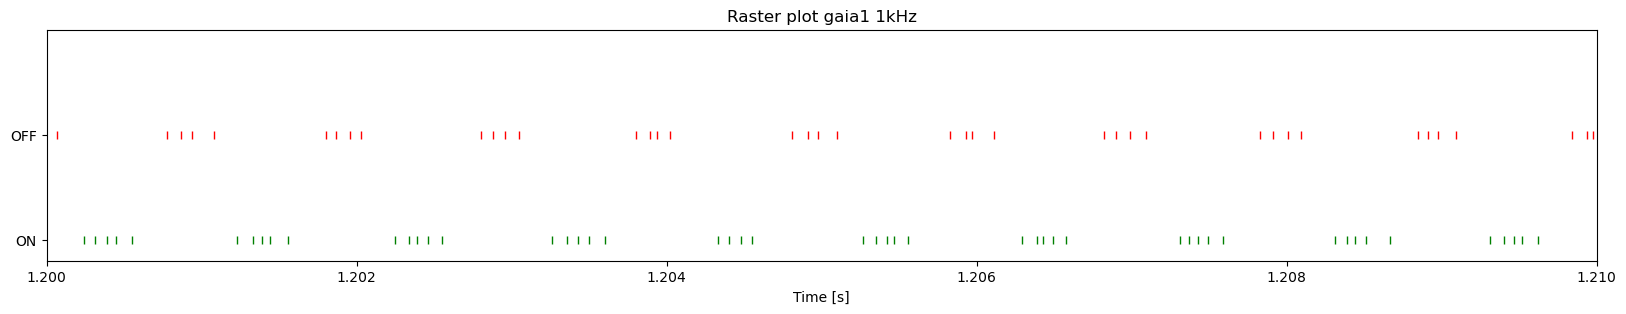

In [20]:
plt.figure(figsize=(20,3))

for e in gaia1_1kHz[10000:12000]:
    if e.p ==0 :
        plt.plot(e.ts*1e-5,1 , 'r|', "OFF")
    if e.p ==1 :
        plt.plot(e.ts*1e-5, 0 , 'g|', "ON")

#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g|',"ON ")
#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r|',"OFF")

        
#plt.legend(prop={'size': 30})
plt.title("Raster plot gaia1 1kHz")
#plt.ylabel("Channel ID")
plt.xlabel("Time [s]")
plt.xlim([1.2,1.21])
plt.ylim([-0.2,2])

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

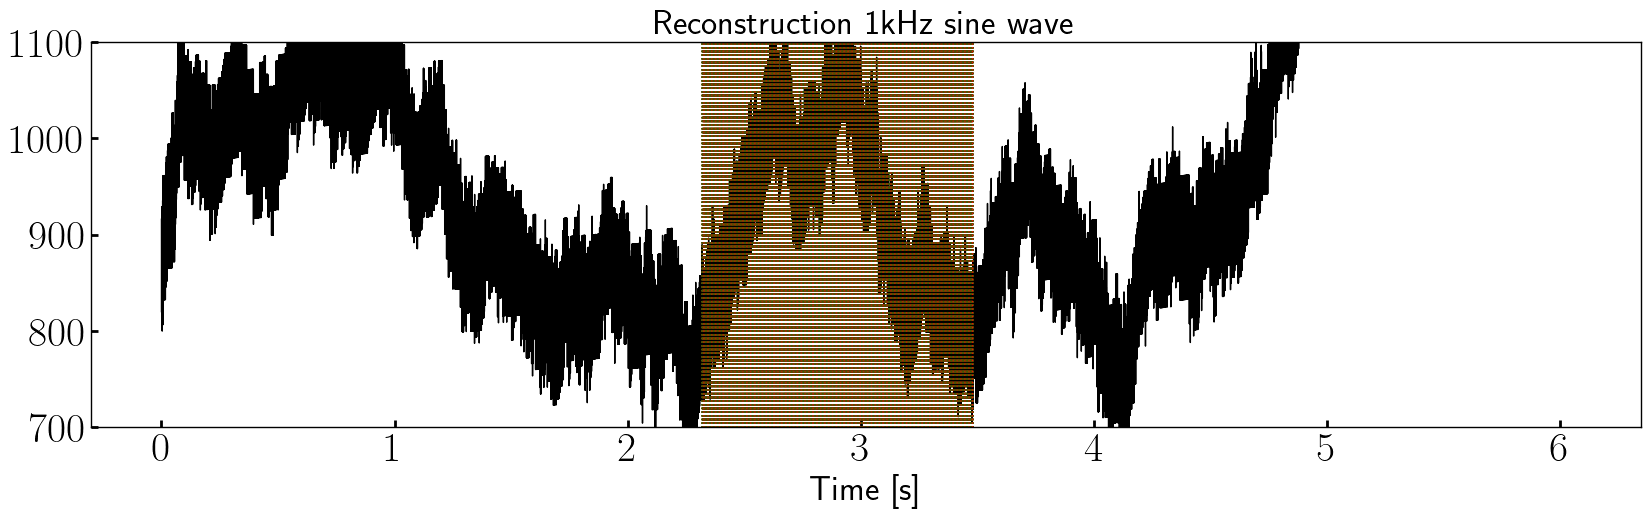

In [188]:
sig,time = reconstruct_channel(gaia1_1kHz,916,858,890.22)

# Plot sine wave

sig = np.asarray(sig)
plt.figure(figsize=(20,5))
plt.plot(time,sig, 'k', linewidth = 1,label = "Reconstruction")

for e in gaia1_1kHz[20000:30000]:
    if e.p ==0 :
        plt.vlines(e.ts*1e-5, 700,1100, color = 'r', linestyle = 'dotted', linewidth = 1)

    if e.p ==1 :
        plt.vlines(e.ts*1e-5, 700,1100, color = 'g', linestyle = 'dotted', linewidth = 1)

plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g|',label = "ON ")
plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r|',label= "OFF")


        
#plt.legend(prop={'size': 30})
plt.title("Reconstruction 1kHz sine wave")
#plt.ylabel("Channel ID")
plt.xlabel("Time [s]")
plt.ylim([700,1100])
plt.label("Voltage [mV]")

plt.xlim([2.515,2.52])

#plt.savefig("reconstructe_1khz.svg")

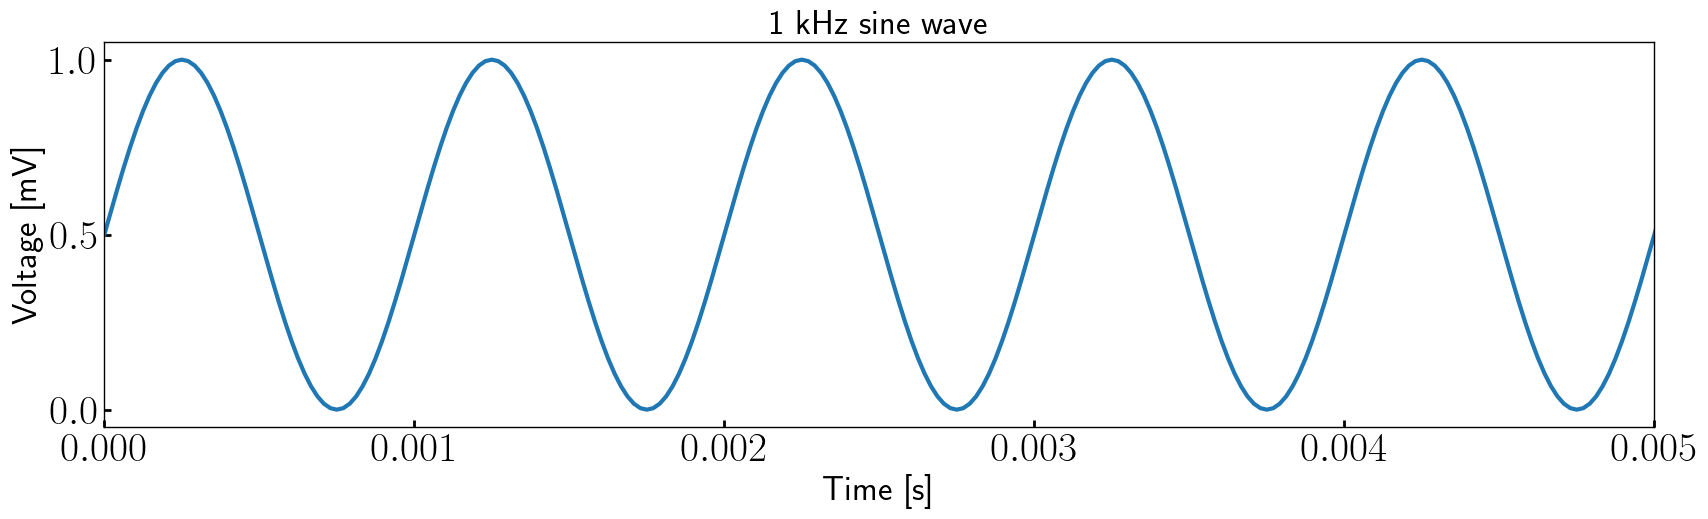

In [75]:
plt.style.use("MC.mplstyle")
# Generate time samples
fs = 48000  # sample rate
T = 1/fs

t = np.arange(0, 0.1, T)# time vector

# Generate sine wave
f = 1000  # frequency
A = 0.5 #amplitude
y = A*np.sin(2*np.pi*f*t) +0.5

plt.figure(figsize=(20,5))

plt.plot(t, y)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [mV]")

plt.xlim([0,0.005])
plt.title("1 kHz sine wave")


plt.savefig("1kHz_sine.svg")

In [42]:
# Generate time samples
fs = 48000  # sample rate
T = 1/fs
t = np.arange(2.5, 2.6, T) # time vector

# Generate sine wave
f = 5000  # frequency
y = (np.sin(2*np.pi*f*t)  +1000)

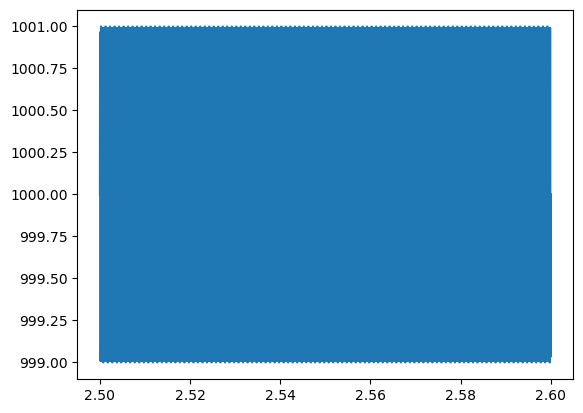

In [43]:
plt.plot(t,y)

In [84]:
fileName = "../Recordings/gaia1_tp_916_858_many_ev_5k.dat"
events = read_dat_file(fileName)
ev = remove_ts_offset(events)
gaia1_1kHz = gaia1_extractor(events)

(-0.2, 2.0)

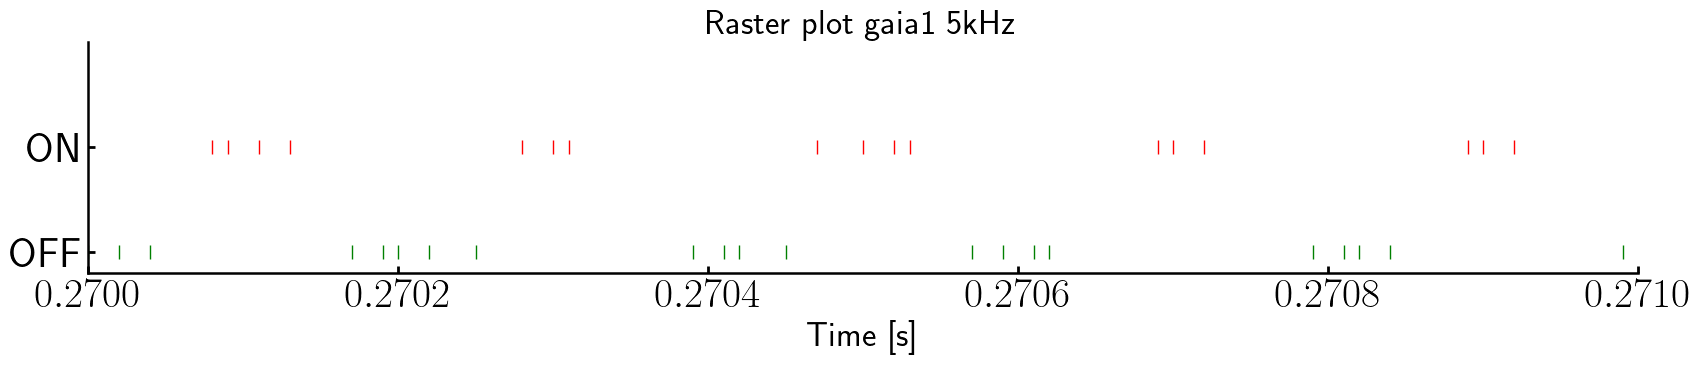

In [89]:
plt.figure(figsize=(20,3))

for e in gaia1_1kHz[10000:12000]:
    if e.p ==0 :
        plt.plot(e.ts*1e-5,1 , 'r|', "OFF")
    if e.p ==1 :
        plt.plot(e.ts*1e-5, 0 , 'g|', "ON")

#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g|',"ON ")
#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r|',"OFF")

        
#plt.legend(prop={'size': 30})
plt.title("Raster plot gaia1 5kHz")
#plt.ylabel("Channel ID")
plt.xlabel("Time [s]")
plt.xlim([0.27,0.271])
plt.ylim([-0.2,2])

In [98]:
fileName = "../Recordings/gaia1_tp_916_858_many_ev_100.dat"
events = read_dat_file(fileName)
ev = remove_ts_offset(events)
gaia1_1kHz = gaia1_extractor(events)

(-0.2, 2.0)

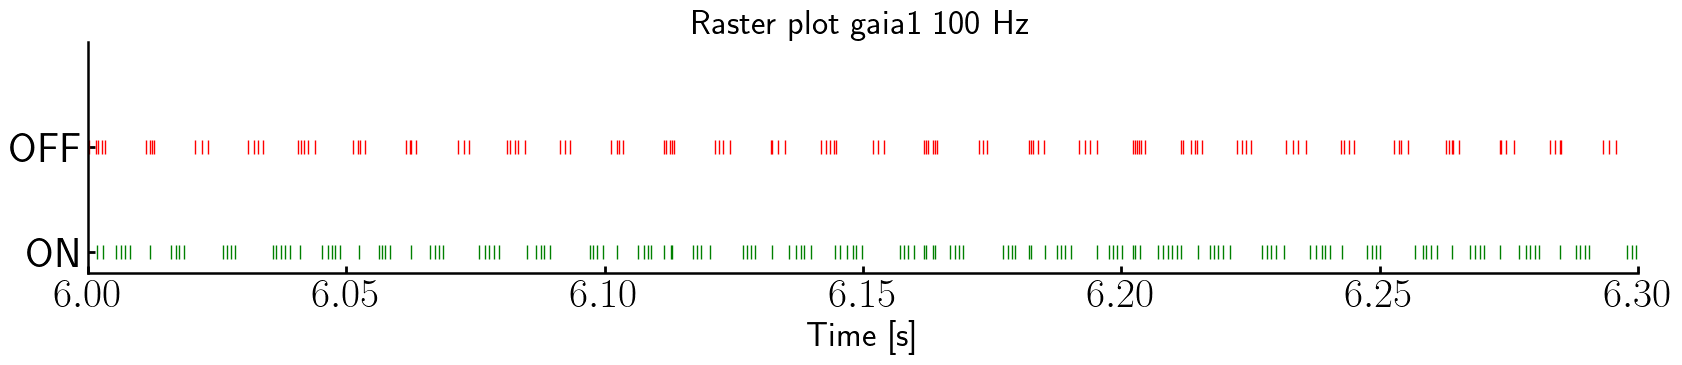

In [99]:
plt.figure(figsize=(20,3))

for e in gaia1_1kHz:
    if e.p ==0 :
        plt.plot(e.ts*1e-5,1 , 'r|', "OFF")
    if e.p ==1 :
        plt.plot(e.ts*1e-5, 0 , 'g|', "ON")

#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'g|',"ON ")
#plt.plot(e.ts*1e-5, e.x + 64*e.y , 'r|',"OFF")

        
#plt.legend(prop={'size': 30})
plt.title("Raster plot gaia1 100 Hz")
#plt.ylabel("Channel ID")
plt.xlabel("Time [s]")
plt.xlim([6,6.3])
plt.ylim([-0.2,2])

In [179]:
sig

TypeError: unsupported operand type(s) for -: 'list' and 'int'